In [1]:
import pandas as pd
import glob
import os
import numpy as np
import itertools

import matplotlib.pyplot as plt


<div class="alert alert-block alert-warning">
<b>Set the right path !</b>
</div>

In [31]:
ONTOLOGYS = [
    'CHEBI', 'CL', 'GO_BP', 'GO_CC', 'GO_MF', 'MOP', 'NCBITaxon', 'PR', 'SO',
    'UBERON'
]

PATH_TO_BIONLP = '../data/bionlp/'
PATH_TO_TERMLISTS = '../data/termlists/'

# Ontologies


In [32]:
# Init dictionaries
on_stats_dict = {}
on_tables_dict = {}

### Loop

In [33]:
for name in ONTOLOGYS:

    nl = name.lower()
    path = PATH_TO_TERMLISTS + name + '.tsv'

    df = pd.read_csv(
        path,
        sep='\t',
        header=None,
        names=["CUI", "ontology", "ID", "name", "preferred_name", "type"])

    # number of unique ids
    on_stats_dict[nl + '_num_unq_ids'] = len(df.ID.unique())
    # number of unique names
    on_stats_dict[nl + '_num_unq_name'] = len(df.name.unique())
    # total number of ids
    on_stats_dict[nl + '_num_tot_ids'] = len(df.ID)
    # total number of names
    on_stats_dict[nl + '_num_tot_name'] = len(df.name)

    on_tables_dict[nl] = df

### Stats

In [34]:
on_stats_dict

{'chebi_num_tot_ids': 96292,
 'chebi_num_tot_name': 96292,
 'chebi_num_unq_ids': 58156,
 'chebi_num_unq_name': 96155,
 'cl_num_tot_ids': 3760,
 'cl_num_tot_name': 3760,
 'cl_num_unq_ids': 2067,
 'cl_num_unq_name': 3756,
 'go_bp_num_tot_ids': 87684,
 'go_bp_num_tot_name': 87684,
 'go_bp_num_unq_ids': 28373,
 'go_bp_num_unq_name': 87672,
 'go_cc_num_tot_ids': 6367,
 'go_cc_num_tot_name': 6367,
 'go_cc_num_unq_ids': 3879,
 'go_cc_num_unq_name': 6366,
 'go_mf_num_tot_ids': 11,
 'go_mf_num_tot_name': 11,
 'go_mf_num_unq_ids': 5,
 'go_mf_num_unq_name': 11,
 'mop_num_tot_ids': 3677,
 'mop_num_tot_name': 3677,
 'mop_num_unq_ids': 3573,
 'mop_num_unq_name': 3677,
 'ncbitaxon_num_tot_ids': 1231437,
 'ncbitaxon_num_tot_name': 1231437,
 'ncbitaxon_num_unq_ids': 1167337,
 'ncbitaxon_num_unq_name': 1226050,
 'pr_num_tot_ids': 710171,
 'pr_num_tot_name': 710171,
 'pr_num_unq_ids': 212975,
 'pr_num_unq_name': 694533,
 'so_num_tot_ids': 5106,
 'so_num_tot_name': 5106,
 'so_num_unq_ids': 2052,
 'so_num_

In [35]:
# on_tables_dict
on_tables_dict['go_mf']

,CUI,ontology,ID,name,preferred_name,type
0,NaN,GO_MF,GO:0097617,annealing activity,annealing activity,molecular_function
1,NaN,GO_MF,GO:0097617,annealing,annealing activity,molecular_function
2,NaN,GO_MF,GO:0097617,hybridization,annealing activity,molecular_function
3,NaN,GO_MF,GO:0030674,"protein binding, bridging","protein binding, bridging",molecular_function
4,NaN,GO_MF,GO:0030674,bridging,"protein binding, bridging",molecular_function
5,NaN,GO_MF,GO:0046983,protein dimerization activity,protein dimerization activity,molecular_function
6,NaN,GO_MF,GO:0046983,dimerization,protein dimerization activity,molecular_function
7,NaN,GO_MF,GO:0043495,protein anchor,protein anchor,molecular_function
8,NaN,GO_MF,GO:0043495,anchor,protein anchor,molecular_function
9,NaN,GO_MF,GO:0046982,protein heterodimerization activity,protein heterodimerization activity,molecular_function


<BarContainer object of 40 artists>

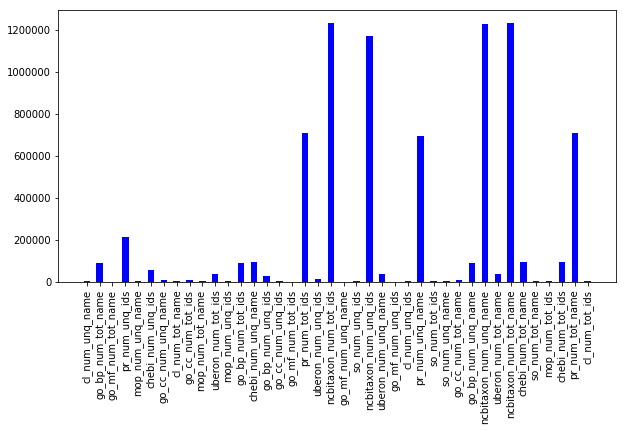

In [36]:
width = .5
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(on_stats_dict.keys(), on_stats_dict.values(), width, color='b')

# Annotations

In [37]:
# Init dictionaries
an_stats_dict = {}
an_tables_dict = {}

### Loop

In [38]:
# CHEBI CL GO_BP GO_CC GO_MF MOP NCBITaxon PR SO UBERON

for name in ONTOLOGYS:

    nl = name.lower()
    path = PATH_TO_BIONLP + name
    all_files = glob.glob(os.path.join(path, "*.bionlp"))

    li = []

    for filename in all_files:
        df = pd.read_csv(filename,
                         index_col=None,
                         sep='\t',
                         names=["span_id", "ID", "name"],
                         header=None)
        if not df.empty:
            df['ID'], df['span'] = df['ID'].str.split(' ', 1).str
            li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)

    # number of unique ids
    an_stats_dict[nl + '_num_unq_ids'] = len(frame.ID.unique())
    # number of unique names
    an_stats_dict[nl + '_num_unq_name'] = len(frame.name.unique())
    # total number of ids
    an_stats_dict[nl + '_num_tot_ids'] = len(frame.ID)
    # total number of names
    an_stats_dict[nl + '_num_tot_name'] = len(frame.name)

    an_tables_dict[nl] = frame

### Stats

In [39]:
an_stats_dict

{'chebi_num_tot_ids': 4548,
 'chebi_num_tot_name': 4548,
 'chebi_num_unq_ids': 477,
 'chebi_num_unq_name': 795,
 'cl_num_tot_ids': 4049,
 'cl_num_tot_name': 4049,
 'cl_num_unq_ids': 234,
 'cl_num_unq_name': 726,
 'go_bp_num_tot_ids': 9280,
 'go_bp_num_tot_name': 9280,
 'go_bp_num_unq_ids': 601,
 'go_bp_num_unq_name': 1510,
 'go_cc_num_tot_ids': 4075,
 'go_cc_num_tot_name': 4075,
 'go_cc_num_unq_ids': 216,
 'go_cc_num_unq_name': 539,
 'go_mf_num_tot_ids': 375,
 'go_mf_num_tot_name': 375,
 'go_mf_num_unq_ids': 4,
 'go_mf_num_unq_name': 22,
 'mop_num_tot_ids': 240,
 'mop_num_tot_name': 240,
 'mop_num_unq_ids': 16,
 'mop_num_unq_name': 51,
 'ncbitaxon_num_tot_ids': 7362,
 'ncbitaxon_num_tot_name': 7362,
 'ncbitaxon_num_unq_ids': 137,
 'ncbitaxon_num_unq_name': 275,
 'pr_num_tot_ids': 17038,
 'pr_num_tot_name': 17038,
 'pr_num_unq_ids': 953,
 'pr_num_unq_name': 1724,
 'so_num_tot_ids': 8797,
 'so_num_tot_name': 8797,
 'so_num_unq_ids': 182,
 'so_num_unq_name': 543,
 'uberon_num_tot_ids': 12

In [40]:
# an_tables_dict
an_tables_dict['go_mf']

,span_id,ID,name,span
0,T1,GO:0097617,hybridization,7350 7363
1,T2,GO:0097617,hybridized,7443 7453
2,T3,GO:0097617,hybridized,8464 8474
3,T4,GO:0097617,hybridized,34506 34516
4,T5,GO:0097617,hybridized,35324 35334
5,T6,GO:0097617,annealing,35548 35557
6,T7,GO:0097617,annealing,37664 37673
7,T1,GO:0097617,annealing,13302 13311
8,T1,GO:0097617,hybridized,38830 38840
9,T1,GO:0097617,hybridization,689 702


<BarContainer object of 40 artists>

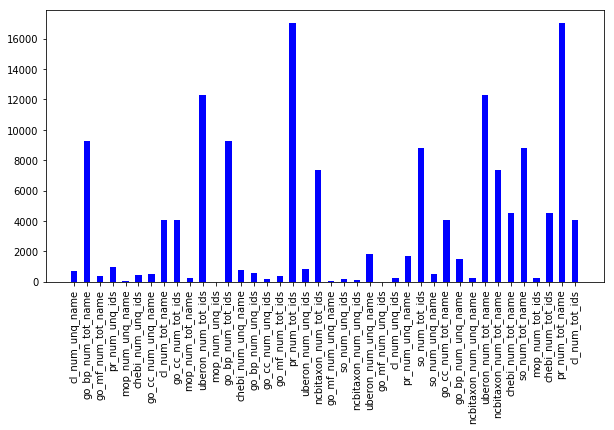

In [41]:
width = .5
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(an_stats_dict.keys(), an_stats_dict.values(), width, color='b')

## Number of unconnected annotations

In [42]:
un_an_stats = {}

for k in an_tables_dict.keys():
    # all annotaions with an offset have at least one ';' in the span
    filtered_frame = an_tables_dict[k].span.where(
        an_tables_dict[k].span.str.count(';') > 0)
    filtered_frame = filtered_frame.dropna()

    un_an_stats[k + '_tot_num'] = len(filtered_frame.index)

un_an_stats['total_num'] = sum(un_an_stats.values())

In [43]:
un_an_stats

{'chebi_tot_num': 18,
 'cl_tot_num': 244,
 'go_bp_tot_num': 493,
 'go_cc_tot_num': 80,
 'go_mf_tot_num': 0,
 'mop_tot_num': 0,
 'ncbitaxon_tot_num': 2,
 'pr_tot_num': 84,
 'so_tot_num': 108,
 'total_num': 1264,
 'uberon_tot_num': 235}

# Overlaps

In [44]:
def span_to_list(span):

    num_li = []
    span_li = span.split(';')
    for s in span_li:
        try:
            ranges = s.split(' ')
            num_li += range(int(ranges[0]), int(ranges[1]) + 1)
        except:
            print('DEBUG: Span are no digits. (in span_to_list func). span: ',s)

    #     li_str = ' '.join(str(e) for e in num_li)
    return num_li


def get_ontology(string):

    onto = string.split(':')[0]

    return onto

## Create Tables by fileIDs

In [45]:
file_IDs_tmp = []
all_files = []
for name in ONTOLOGYS:
    #for name in ['CHEBI', 'CL']:

    nl = name.lower()
    path = PATH_TO_BIONLP + name
    all_files += glob.glob(os.path.join(path, "*.bionlp"))

    # get all file IDs

    for filename in all_files:
        # print('FILENAME:', filename.split('/')[4].split('.')[0]) # DEBUG
        file_IDs_tmp.append(
            filename.split('/')[4].split('.')[0])  # get the file-ID

file_IDs = list(set(file_IDs_tmp))

df_dict = {}
counter = 0
for file_ID in file_IDs:

    li = []

    for filename in all_files:
        if filename.split('/')[4].split('.')[0] == file_ID:
            # print(file_ID, counter) # DEBUG
            ontology_name = filename.split('/')[3]
            # print(ontology_name) # DEBUG
            counter += 1

            # create
            df = pd.read_csv(filename,
                             index_col=None,
                             sep='\t',
                             names=["span_id", "ID", "name"],
                             header=None)
            df['fileID'] = file_ID
            df['ontology'] = ontology_name  #df['ID'].apply(get_ontology)

            if not df.empty:
                df['ID'], df['span'] = df['ID'].str.split(' ', 1).str
                li.append(df)

    # DO STATS FOR FILES WITH SAME NAME
    frame = pd.concat(li, axis=0, ignore_index=True)

    df_dict[str(file_ID)] = frame  # store dataframe for each file_ID

    counter = 0

# print(df_dict['17244351']) # Debug

## Overlap by ontology 

In [46]:
def get_matches(dataframe):

    #--------------------------------------------------------------
    # A. Create list of word positions for each ontology
    #--------------------------------------------------------------

    # Init dict
    onto_words_idx = {}
    for onto in ONTOLOGYS:
        onto_words_idx[onto] = []

    # print(onto_words_idx)  # DEBUG

    for index, row in dataframe.iterrows():

        onto_name = row['ontology']
        span_list = span_to_list(row['span'])

        # print(span_list, onto_name)  # DEBUG
        onto_words_idx[onto_name].append(span_list)

    #--------------------------------------------------------------
    # B. Create a set of all positions for each ontology
    #--------------------------------------------------------------

    all_positions = {}
    for onto in ONTOLOGYS:
        all_positions[onto] = set(
            list(itertools.chain.from_iterable(onto_words_idx[onto])))

    #--------------------------------------------------------------
    # C. Loop through all words and search for matches in in the other ontologies
    #--------------------------------------------------------------

    match_counter = 0
    match_list = []
    for idx, onto in enumerate(ONTOLOGYS):

        for char_idx_list in onto_words_idx[onto]:
            # print('char_idx_list', char_idx_list, onto)  # DEBUG
            char_idx_set = set(char_idx_list)

            # run through the ontology that are left
            for i in range(idx + 1, len(ONTOLOGYS)):

                is_true = (bool(all_positions[ONTOLOGYS[i]] & char_idx_set))
                if is_true:
                    match_counter += 1
                    match_list.append([ONTOLOGYS[i], onto])
                    #print('is true = ', is_true,' for ontologies:', ONTOLOGYS[i], ' and ', onto)

    print('Matches = ', match_counter)

    return match_list, match_counter

In [47]:
ontology_overlaps = []
total_matches = 0
for key in df_dict.keys():
    print(key)
    # get for each file all the matches
    m_list, m_counter = get_matches(df_dict[key])

    ontology_overlaps.append([key, m_list, m_counter])
    total_matches += m_counter

16121255
Matches =  23
17447844
Matches =  77
12079497
Matches =  11
15836427
Matches =  63
16462940
Matches =  41
15550985
Matches =  42
14723793
Matches =  10
16433929
Matches =  26
17590087
Matches =  6
17244351
Matches =  38
11532192
Matches =  14
15005800
Matches =  99
15676071
Matches =  66
15819996
Matches =  41
15492776
Matches =  86
15314659
Matches =  12
16670015
Matches =  13
17194222
Matches =  68
15320950
Matches =  42
15630473
Matches =  67
17069463
Matches =  56
16539743
Matches =  77
17002498
Matches =  86
15040800
Matches =  46
17696610
Matches =  24
15917436
Matches =  157
16110338
Matches =  74
16362077
Matches =  67
16221973
Matches =  93
11597317
Matches =  13
14737183
Matches =  47
12546709
Matches =  25
16870721
Matches =  3
16109169
Matches =  53
16255782
Matches =  8
15876356
Matches =  19
16628246
Matches =  111
15061865
Matches =  56
15588329
Matches =  137
16216087
Matches =  50
15328533
Matches =  46
16098226
Matches =  30
16507151
Matches =  2
16103912
Mat

In [48]:
print('TOTAL MATCHES:', total_matches)

TOTAL MATCHES: 3362


## Overlaps for EACH ontology in a single file

In [49]:
def get_word_overlaps(dataframe):

    #--------------------------------------------------------------
    # A. Create list of word positions for each ontology
    #--------------------------------------------------------------

    # Init word dict
    onto_words_idx = {}
    for onto in ONTOLOGYS:
        onto_words_idx[onto] = []

    # print(onto_words_idx)  # DEBUG

    for index, row in dataframe.iterrows():

        onto_name = row['ontology']  # get the name of the ontology
        span_list = span_to_list(
            row['span']
        )  # get for each annotation a list of its character positions

        # print(span_list, onto_name)  # DEBUG
        onto_words_idx[onto_name].append(span_list)

    #--------------------------------------------------------------
    # B.
    #--------------------------------------------------------------

    match_counter = 0
    match_list = []
    for onto in ONTOLOGYS:
        # print('---- New Ontology: ', onto) # DEBUG

        # get span of the target word
        for idx, char_idx_list in enumerate(onto_words_idx[onto]):
            # print('char_idx_list', char_idx_list, onto)  # DEBUG
            char_idx_set = set(char_idx_list)

            # compare target word with succeeding words
            for i in range(idx + 1, len(onto_words_idx[onto])):

                char_idx_list_2 = onto_words_idx[onto][i]

                is_true = (bool(char_idx_set & set(char_idx_list_2)))
                if is_true:
                    match_counter += 1
                    match_list.append(onto)
                    # print('Symmetric difference: ', char_idx_set ^ set(char_idx_list_2))  # DEBUG
                    # print('INTERSECTION: ',char_idx_set & set(char_idx_list_2))  # DEBUG
                    # print('BOTH: ',char_idx_set, set(char_idx_list_2)) # DEBUG
                    # print('is true = ', is_true,' for words in:', onto) # DEBUG

    print('**** Matches = ', match_counter)

    return match_list, match_counter

In [50]:
word_overlaps = []
total_w_overlaps = 0

key = '17244351'
for key in df_dict.keys():

    print(key)
    # get for each file all the matches
    overlap_list, overlap_counter = get_word_overlaps(df_dict[key])

    word_overlaps.append([key, overlap_list, overlap_counter])
    total_w_overlaps += overlap_counter

16121255
**** Matches =  3
17447844
**** Matches =  9
12079497
**** Matches =  3
15836427
**** Matches =  85
16462940
**** Matches =  0
15550985
**** Matches =  0
14723793
**** Matches =  2
16433929
**** Matches =  3
17590087
**** Matches =  2
17244351
**** Matches =  3
11532192
**** Matches =  1
15005800
**** Matches =  27
15676071
**** Matches =  6
15819996
**** Matches =  23
15492776
**** Matches =  37
15314659
**** Matches =  0
16670015
**** Matches =  14
17194222
**** Matches =  10
15320950
**** Matches =  11
15630473
**** Matches =  10
17069463
**** Matches =  13
16539743
**** Matches =  4
17002498
**** Matches =  40
15040800
**** Matches =  6
17696610
**** Matches =  10
15917436
**** Matches =  9
16110338
**** Matches =  5
16362077
**** Matches =  13
16221973
**** Matches =  49
11597317
**** Matches =  3
14737183
**** Matches =  13
12546709
**** Matches =  3
16870721
**** Matches =  6
16109169
**** Matches =  9
16255782
**** Matches =  0
15876356
**** Matches =  12
16628246
****

In [51]:
print('TOTAL WORD OVERLAPS:', total_w_overlaps)

TOTAL WORD OVERLAPS: 788


In [52]:
word_overlaps

[['16121255', ['GO_BP', 'SO', 'UBERON'], 3],
 ['17447844',
  ['CL',
   'GO_BP',
   'GO_BP',
   'GO_CC',
   'GO_CC',
   'GO_CC',
   'GO_CC',
   'GO_CC',
   'NCBITaxon'],
  9],
 ['12079497', ['CL', 'CL', 'SO'], 3],
 ['15836427',
  ['CL',
   'CL',
   'CL',
   'CL',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'PR',
   'SO',
   'UBERON',
   'UBERON',
   'UBERO